In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab as pyl
import pyaudio
import wave
import sys
from scipy.io import wavfile

#Introduction

Human’s language ability is distinctive, while animals do show some primitive speaking abilities.
The first clear evidence was found in vervet monkey, which has been found to use three types of alarms in wild, i.e., snake alarms, eagle alarms, and leopard alarms. Each alarm evokes contrasting responses. Monkeys on the ground respond to leopard alarms by running into trees, to eagle alarms by looking up, and to snake alarms by looking down. Playback experiments confirmed that the responses were triggered by sound.

These alarms sound quite different even to human ears. However, not all animal speech are that easily distinguishable. What if zoologist don't agree to each other? Is there a more objective way to decide the meaning of anmial speech? The answer is yes. I propose a methodology here, using vervet monkey's alarm as an example. First, we use clustering to categorize audios to three groups. If they match the classification by zoologist, then we're confident about our data and method. This method can helps to solves controversial cases where zoologists don't get consensus.

Furthermore, once the classification is confirmed by clustering, we can train a supervised model, which in the future, can be used to interprete new audio records. We may implement it in laptops, or even smartphones. We can easily see how it, if succeeds, will help zoologist in the wild.

To apply machine learning techniques, I find a [video](http://www.arkive.org/vervet/chlorocebus-pygerythrus/video-11a.html)
 about vervet monkey, extract the audio track, manually truncated it to small parts containing different type of alarms (snake.wav, eagle\_[1-6].wav, leopard_[1-2].wav), and made some analysis.

_Refenerce_

1. Seyfarth R M, Cheney D L, Marler P. Vervet monkey alarm calls: semantic communication in a free-ranging primate[J]. Animal Behaviour, 1980, 28(4): 1070-1094.
2. Seyfarth R M, Cheney D L, Marler P. Monkey responses to three different alarm calls: evidence of predator classification and semantic communication[J]. Science, 1980, 210(4471): 801-803.




#Get a sense
First we play audio, plot tones and spectrogram. 

In [18]:
# Play the snake alarm
CHUNK = 1024

wf = wave.open('snake.wav', 'rb')

p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

data = wf.readframes(CHUNK)

while data != '':
    stream.write(data)
    data = wf.readframes(CHUNK)

stream.stop_stream()
stream.close()

p.terminate()

[ 0.05316162  0.05053711  0.04733276 ..., -0.07821655 -0.07839966
 -0.07714844]


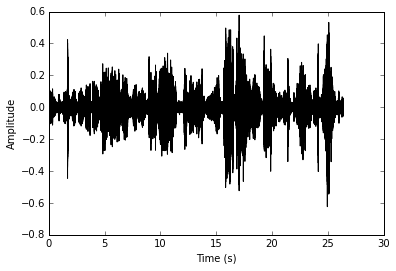

In [44]:
# Plot the tone of snake alarm. 
# Codes are adjusted from http://samcarcagno.altervista.org/blog/basic-sound-processing-python

sampFreq, frames = wavfile.read('snake.wav') 
frames = frames / (2.**15) # Scale to [-1,1]
channels = [
    np.array(frames[:, 0]),
    np.array(frames[:, 1])
] # Two channels exist. For simplicity, we use only one for plots

timeArray = np.arange(0, float(frames.shape[0]), 1)
timeArray = timeArray / sampFreq
plt.plot(timeArray, channels[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

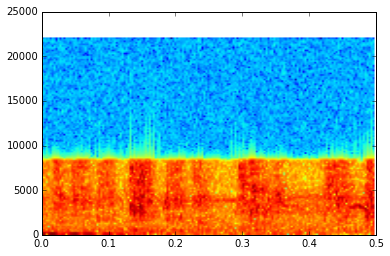

In [17]:
# Plot spectrogram. Codes adujuseted from http://matplotlib.org/examples/pylab_examples/specgram_demo.html
t0 = 9 
t1 = 9.5 
sound = channels[0][t0*fs : t1*fs] # Slicing the sound
Pxx, freqs, t, plot = pyl.specgram(sound, Fs=sampFreq)

In [232]:
# Play the eagle alarm
CHUNK = 1024

wf = wave.open('eagle_1.wav', 'rb')

p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

data = wf.readframes(CHUNK)

while data != '':
    stream.write(data)
    data = wf.readframes(CHUNK)

stream.stop_stream()
stream.close()

p.terminate()

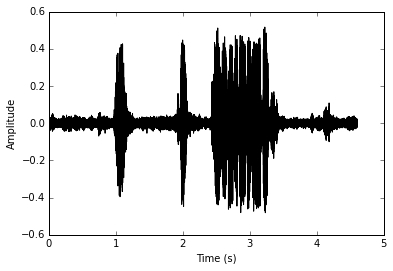

In [21]:
# Plot the tone of snake alarm. 
# Codes are adjusted from http://samcarcagno.altervista.org/blog/basic-sound-processing-python

sampFreq, frames = wavfile.read('eagle_1.wav') 
frames = frames / (2.**15) # Scale to [-1,1]
channels = [
    np.array(frames[:, 0]),
    np.array(frames[:, 1])
] # Two channels exist. For simplicity, we use only one for plots

timeArray = np.arange(0, float(frames.shape[0]), 1)
timeArray = timeArray / sampFreq
plt.plot(timeArray, channels[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

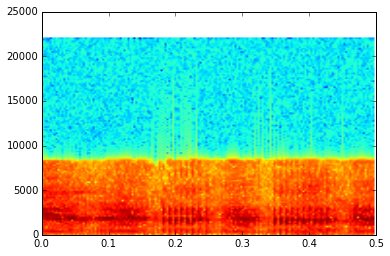

In [24]:
# Plot spectrogram. Codes adujuseted from http://matplotlib.org/examples/pylab_examples/specgram_demo.html
t0 = 2.5
t1 = 3 
sound = channels[0][t0*fs : t1*fs] # Slicing the sound
Pxx, freqs, t, plot = pyl.specgram(sound, Fs=sampFreq)

In [233]:
# Play the leopard alarm
CHUNK = 1024

wf = wave.open('leopard_1.wav', 'rb')

p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

data = wf.readframes(CHUNK)

while data != '':
    stream.write(data)
    data = wf.readframes(CHUNK)

stream.stop_stream()
stream.close()

p.terminate()

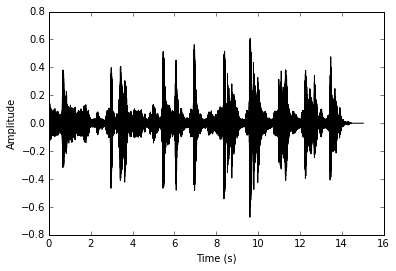

In [31]:
# Plot the tone of snake alarm. 
# Codes are adjusted from http://samcarcagno.altervista.org/blog/basic-sound-processing-python

sampFreq, frames = wavfile.read('leopard_2.wav') 
frames = frames / (2.**15) # Scale to [-1,1]
channels = [
    np.array(frames[:, 0]),
    np.array(frames[:, 1])
] # Two channels exist. For simplicity, we use only one for plots

timeArray = np.arange(0, float(frames.shape[0]), 1)
timeArray = timeArray / sampFreq
plt.plot(timeArray, channels[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

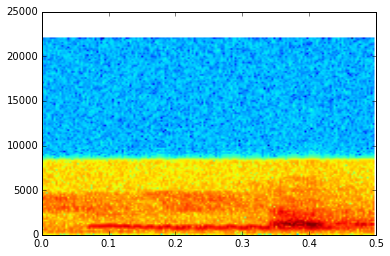

In [30]:
# Plot spectrogram. Codes adujuseted from http://matplotlib.org/examples/pylab_examples/specgram_demo.html
t0 = 8
t1 = 8.5 
sound = channels[0][t0*fs : t1*fs] # Slicing the sound
Pxx, freqs, t, plot = pyl.specgram(sound, Fs=sampFreq)

Looking at the spectrograms, we see that they agree to previous [studies](http://www.psych.upenn.edu/~seyfarth/Baboon%20research/vervet%20vox.htm).

From snake, to eagle, to leopard alarm, the range of characteristic frequency narrows and decreases. Snake alarm frequency ranges from ~1000 to 8000 Hz, and spreads relatively uniformly; eagle alarm occupies roughly the same range but has significant components in low frequency part; leopard alarm almost only has contributions from the low frequency part. If you listen to the audio, probably you can confirm such differences.

# Generate features
Now we extract input features from audios for clustering. For each audio, it's 

- sliced by a sliding window with length = 1024 and offset = 64 to get many frames, namely, 93.75% overlap between neighbouring frames;
- for each frame, Hamming window is applied for smoothing;
- then fast Fourier transform is applied;
- weak frames are discarded (detailed below).

In [7]:
import scipy
from scipy.signal import hamming 
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [101]:
# Codes adjusted from http://eprints.maynoothuniversity.ie/4115/1/40.pdf
def make_frames(audio_file):
    # read audio samples
    sampFreq, input_data = wavfile.read(audio_file)
    frames = []
    step = 1024 # sliding window size
    window = hamming(1024) # get a Hanning window
    input_data = input_data / (2.**15) # Scale to [-1,1]
    channels = [
        np.array(input_data[:, 0]),
        np.array(input_data[:, 1])
    ]

    for channel in channels:
        for i in range(0, len(channel), step):
            audio = channel[i : i+step]
            if len(audio) == step: # neglect last slice
                audio = audio * window # apply window
                mags = abs(fft(audio))
                frames.append(mags)
    return frames

Now we plot the mean absolute magnitude of each frame to decide the threshold for weak frame.

Mean magnitude:  0.307267322973
Magnitude quantiles:
        Min: 0.0637406913838
        25%: 0.100095042643
        Median: 0.1228736715
        75%: 0.32057443522            
        Max: 1.52384526366


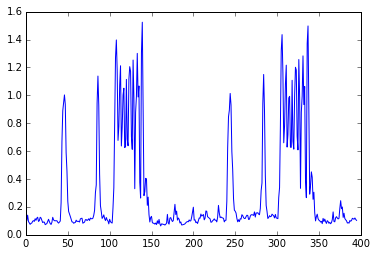

In [302]:
mean_mag = []
file_name = 'eagle_1.wav'
frames = make_frames(file_name)
for f in frames:
    mean_mag.append(abs(f).mean())
plt.plot(range(len(frames)), mean_mag)
quantiles = np.percentile(mean_mag, range(0,101,25))
print 'Mean magnitude: ', np.mean(mean_mag)
print '''Magnitude quantiles:
        Min: {0}
        25%: {1}
        Median: {2}
        75%: {3}            
        Max: {4}'''.format(*quantiles)

Mean magnitude:  0.235878144546
Magnitude quantiles:
        Min: 0.0671505218439
        25%: 0.116344185379
        Median: 0.167975297191
        75%: 0.275986353739            
        Max: 1.86522749977


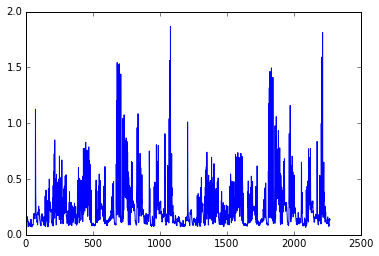

In [303]:
mean_mag = []
file_name = 'snake.wav'
frames = make_frames(file_name)
for f in frames:
    mean_mag.append(abs(f).mean())
plt.plot(range(len(frames)), mean_mag)
quantiles = np.percentile(mean_mag, range(0,101,25))
print 'Mean magnitude: ', np.mean(mean_mag)
print '''Magnitude quantiles:
        Min: {0}
        25%: {1}
        Median: {2}
        75%: {3}            
        Max: {4}'''.format(*quantiles)

Mean magnitude:  0.220254711524
Magnitude quantiles:
        Min: 0.0672795142948
        25%: 0.117886672987
        Median: 0.166316956593
        75%: 0.264349272813            
        Max: 1.09697258541


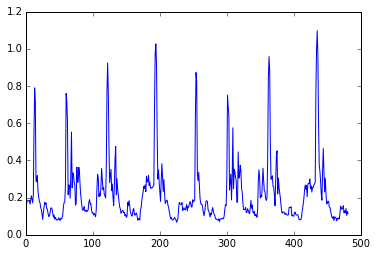

In [304]:
mean_mag = []
file_name = 'leopard_1.wav'
frames = make_frames(file_name)
for f in frames:
    mean_mag.append(abs(f).mean())
plt.plot(range(len(frames)), mean_mag)
quantiles = np.percentile(mean_mag, range(0,101,25))
print 'Mean magnitude: ', np.mean(mean_mag)
print '''Magnitude quantiles:
        Min: {0}
        25%: {1}
        Median: {2}
        75%: {3}            
        Max: {4}'''.format(*quantiles)

Because I haven't done any noise reduction, a high theshhold is better to eliminate noise and keep only relevant frames. I choose 0.5 as the theshhold.

In [129]:
thesh = 0.5
snake_inputs = [f for f in make_frames('snake.wav') if abs(f).mean() > thesh]

eagle_inputs = []
for i in range(1,7):
    file_name = 'eagle_' + str(i) + '.wav'
    tmp = [f for f in make_frames(file_name) if abs(f).mean() > thesh]
    eagle_inputs += tmp
    
leopard_inputs = []
for i in range(1,3):
    file_name = 'leopard_' + str(i) + '.wav'
    tmp = [f for f in make_frames(file_name) if abs(f).mean() > thesh]
    leopard_inputs += tmp
    
alarm_len = map(len,[snake_inputs,eagle_inputs, leopard_inputs]) # the number of input points of each type of alarm
data = snake_inputs + eagle_inputs + leopard_inputs

In [130]:
print alarm_len

[196, 241, 141]


#Clustering
Now I use clustering algorithms to get 3 clusters. I try three algotithms, GMM, k-Means, and [PAM](https://en.wikipedia.org/wiki/K-medoids), which is considered to be more robust thatn k-Means.

First I use PCA to reduce feature dimensions.

In [131]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99) # with 99% variance kept
reduced_data = pca.fit_transform(data)
# Print the components and the amount of variance in the data contained in each dimension
# print pca.components_
print "{}% variance kept.".format(sum(pca.explained_variance_ratio_) * 100)
print "{} features after PCA.".format(len(pca.explained_variance_ratio_))

99.0074639897% variance kept.
97 features after PCA.


Now we use K-Means to get 3 clusters.

In [67]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [178]:
n_clusters = 3
clusters = GMM(n_components=n_clusters).fit(reduced_data)

In [179]:
pred = list(clusters.predict(reduced_data))
snake_counts = [pred[: alarm_len[0]].count(i) for i in range(3)]
eagle_counts = [pred[alarm_len[0]: alarm_len[0] + alarm_len[1]].count(i) for i in range(3)]
leopard_counts = [pred[-alarm_len[2] :].count(i) for i in range(3)]

In [180]:
from tabulate import tabulate
print tabulate([['Snake'] + list(snake_counts) + [float(max(snake_counts))/sum(snake_counts)],
                ['Eagle'] + list(eagle_counts) + [float(max(eagle_counts))/sum(eagle_counts)], 
                ['Leopard'] + list(leopard_counts) + [float(max(leopard_counts))/sum(leopard_counts)]], 
               headers=['GMM', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Accuracy'])

GMM        Cluster 1    Cluster 2    Cluster 3    Accuracy
-------  -----------  -----------  -----------  ----------
Snake             37          144           15    0.734694
Eagle            131            8          102    0.543568
Leopard           20            0          121    0.858156


In [175]:
n_clusters = 3
clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)

In [176]:
pred = list(clusters.predict(reduced_data))
snake_counts = [pred[: alarm_len[0]].count(i) for i in range(3)]
eagle_counts = [pred[alarm_len[0]: alarm_len[0] + alarm_len[1]].count(i) for i in range(3)]
leopard_counts = [pred[-alarm_len[2] :].count(i) for i in range(3)]

In [177]:
print tabulate([['Snake'] + list(snake_counts) + [float(max(snake_counts))/sum(snake_counts)],
                ['Eagle'] + list(eagle_counts) + [float(max(eagle_counts))/sum(eagle_counts)], 
                ['Leopard'] + list(leopard_counts) + [float(max(leopard_counts))/sum(leopard_counts)]], 
               headers=['K-Means', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Accuracy'])

K-Means      Cluster 1    Cluster 2    Cluster 3    Accuracy
---------  -----------  -----------  -----------  ----------
Snake                0            1          195    0.994898
Eagle                0          185           56    0.767635
Leopard            101            4           36    0.716312


In [153]:
# Adjusted from http://www.cnblogs.com/wenhoujx/p/3147563.html (in Chinese)
from scipy.spatial.distance import cdist
import random
import copy

def kmedoids(data, k):
    '''
given the data and # of clusters, compute the best clustering based on the algorithm provided in wikipedia: google pam algorithm.
'''
    # cur_medoids compare with old_medoids, convergence achieved if no change in the list of medoids in consecutive iterations.
    # tmp_medoids is cur_medoids swapped only one pair of medoid and non-medoid data point.
    # best_medoids is the best tmp_medoids through all possible swaps.

    N = len(data)
    cur_medoids = {}
    cur_medoids['medoids'] = range(k)
    clustering(data, cur_medoids)
    total_cost(data, cur_medoids)
    old_medoids = {}
    old_medoids['medoids'] = []

    iter_counter = 1
    # stop if no improvement.
    while not set(old_medoids['medoids']) == set(cur_medoids['medoids']):
        print 'iteration couter:' , iter_counter
        iter_counter = iter_counter + 1
        best_medoids = copy.deepcopy(cur_medoids)
        old_medoids = copy.deepcopy(cur_medoids)
        # pdb.set_trace()
        # iterate over all medoids and non-medoids
        for i in range(N):
            for j in range(k):
                if not i ==j :
                    # swap only a pair
                    tmp_medoids = copy.deepcopy(cur_medoids)
                    tmp_medoids['medoids'][j] = i

                    clustering(data, tmp_medoids)
                    total_cost(data, tmp_medoids)
                    # pick out the best configuration.
                    if( best_medoids['total_cost'] > tmp_medoids['total_cost']):
                        best_medoids = copy.deepcopy(tmp_medoids)
        cur_medoids = copy.deepcopy(best_medoids)
        print 'current total cost is ', cur_medoids['total_cost']
    return cur_medoids

def clustering(data, medoids):
    '''
compute the belonging of each data point according to current medoids centers, and eucludiean distance.
'''

    # pdb.set_trace()
    med_idx = medoids['medoids']
    med = data[med_idx]
    k = len(med_idx)


    dis = cdist(data, med)
    best_med_it_belongs_to = dis.argmin(axis = 1)
    for i in range(k):
        medoids[i] = pyl.where(best_med_it_belongs_to == i)

def total_cost(data, medoids):
    '''
compute the total cost based on current setting.
'''
    med_idx = medoids['medoids'];
    k = len(med_idx);
    cost = 0.0;

    med = data[ med_idx]
    dis = cdist( data, med, 'euclidean')
    cost = dis.min(axis = 1).sum()
    medoids['total_cost'] = [cost]

In [185]:
clusters = kmedoids(reduced_data,3)

iteration couter: 1
current total cost is  [30893.438757834247]
iteration couter: 2
current total cost is  [27963.929127883832]
iteration couter: 3
current total cost is  [27490.464908059086]
iteration couter: 4
current total cost is  [27490.464908059086]


In [186]:
pred = np.ones(len(reduced_data))
for i in clusters[0]:
    pred[i] = 0
for i in clusters[1]:
    pred[i] = 1
for i in clusters[2]:
    pred[i] = 2
pred = list(pred)
snake_counts = [pred[: alarm_len[0]].count(i) for i in range(3)]
eagle_counts = [pred[alarm_len[0]: alarm_len[0] + alarm_len[1]].count(i) for i in range(3)]
leopard_counts = [pred[-alarm_len[2] :].count(i) for i in range(3)]

In [187]:
from tabulate import tabulate
print tabulate([['Snake'] + list(snake_counts) + [float(max(snake_counts))/sum(snake_counts)],
                ['Eagle'] + list(eagle_counts) + [float(max(eagle_counts))/sum(eagle_counts)], 
                ['Leopard'] + list(leopard_counts) + [float(max(leopard_counts))/sum(leopard_counts)]], 
               headers=['PAM', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Accuracy'])

PAM        Cluster 1    Cluster 2    Cluster 3    Accuracy
-------  -----------  -----------  -----------  ----------
Snake             11            0          185    0.943878
Eagle            209            0           32    0.86722
Leopard           13          108           20    0.765957


We see that GMM is the poorest, but it still gets >50% accuracy, better than random guess (33% accuracy). Both k-means and PAM give satisfactory results. For k-means and PAM, most of snake alarms are correctly identified, while for eagle and leopard alarms, PAM achieves at least 75% accuracy while k-means gets >70%. In all cases, snake alarms are well classified. It can be understood from our previous observation that snake alarms have significant component in high frequency region, while the others don't.

#Supervised learning
As we have verified primatologists' conclusion. Now we can turn to supervised learning. I try four models here, SVM, decision tree, AdaBoost, and Gaussian naive Bayes.

In [196]:
X_all = reduced_data
y_all = [0]*alarm_len[0] + [1]*alarm_len[1] + [2]*alarm_len[2]

# Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3)
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])

Training set: 404 samples
Test set: 174 samples


In [209]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
print "Confusion matrix for training set: \n", confusion_matrix(y_train, clf.predict(X_train))
print "Accuracy for training set: ", accuracy_score(y_train, clf.predict(X_train))
print "Confusion matrix for test set: \n", confusion_matrix(y_test, clf.predict(X_test))
print "Accuracy for test set: ", accuracy_score(y_test, clf.predict(X_test))

Confusion matrix for training set: 
[[137   0   0]
 [  0 165   0]
 [  0   0 102]]
Accuracy for training set:  1.0
Confusion matrix for test set: 
[[39 20  0]
 [ 0 76  0]
 [ 0 36  3]]
Accuracy for test set:  0.67816091954


In [210]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print "Confusion matrix for training set: \n", confusion_matrix(y_train, clf.predict(X_train))
print "Accuracy for training set: ", accuracy_score(y_train, clf.predict(X_train))
print "Confusion matrix for test set: \n", confusion_matrix(y_test, clf.predict(X_test))
print "Accuracy for test set: ", accuracy_score(y_test, clf.predict(X_test))

Confusion matrix for training set: 
[[137   0   0]
 [  0 165   0]
 [  0   0 102]]
Accuracy for training set:  1.0
Confusion matrix for test set: 
[[55  4  0]
 [ 1 74  1]
 [ 0  3 36]]
Accuracy for test set:  0.948275862069


In [211]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

print "Confusion matrix for training set: \n", confusion_matrix(y_train, clf.predict(X_train))
print "Accuracy for training set: ", accuracy_score(y_train, clf.predict(X_train))
print "Confusion matrix for test set: \n", confusion_matrix(y_test, clf.predict(X_test))
print "Accuracy for test set: ", accuracy_score(y_test, clf.predict(X_test))

Confusion matrix for training set: 
[[137   0   0]
 [  0 165   0]
 [  1   2  99]]
Accuracy for training set:  0.992574257426
Confusion matrix for test set: 
[[57  2  0]
 [ 0 76  0]
 [ 1  2 36]]
Accuracy for test set:  0.971264367816


In [212]:
# Train a Gaussian naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

print "Confusion matrix for training set: \n", confusion_matrix(y_train, clf.predict(X_train))
print "Accuracy for training set: ", accuracy_score(y_train, clf.predict(X_train))
print "Confusion matrix for test set: \n", confusion_matrix(y_test, clf.predict(X_test))
print "Accuracy for test set: ", accuracy_score(y_test, clf.predict(X_test))

Confusion matrix for training set: 
[[126   7   4]
 [  8 154   3]
 [  3   3  96]]
Accuracy for training set:  0.930693069307
Confusion matrix for test set: 
[[54  4  1]
 [ 3 71  2]
 [ 2  0 37]]
Accuracy for test set:  0.931034482759


#Tuning
Looking at confusion matrices in test set. We see that SVM fails. The others are OK. Decision trees and AdaBoost are excellent. Let's tune them further.

In [229]:
# Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import StratifiedShuffleSplit

ssscv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.1) # Build a stratified shuffle object
parameters = {'max_depth': range(1,X_test.shape[0],10)}
clf = DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, cv = ssscv)
clf.fit(X_train, y_train)

print "Optimal parameters: ", clf.best_params_
print "Confusion matrix for training set: \n", confusion_matrix(y_train, clf.predict(X_train))
print "Accuracy for training set: ", accuracy_score(y_train, clf.predict(X_train))
print "Confusion matrix for test set: \n", confusion_matrix(y_test, clf.predict(X_test))
print "Accuracy for test set: ", accuracy_score(y_test, clf.predict(X_test))

Optimal parameters:  {'max_depth': 91}
Confusion matrix for training set: 
[[137   0   0]
 [  0 165   0]
 [  0   0 102]]
Accuracy for training set:  1.0
Confusion matrix for test set: 
[[55  4  0]
 [ 2 72  2]
 [ 2  3 34]]
Accuracy for test set:  0.925287356322


In [231]:
ssscv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.1) # Build a stratified shuffle object
parameters = {'n_estimators': range(1,100,10)}
clf = AdaBoostClassifier()
clf = GridSearchCV(clf, parameters, cv = ssscv)
clf.fit(X_train, y_train)

print "Optimal parameters: ", clf.best_params_
print "Confusion matrix for training set: \n", confusion_matrix(y_train, clf.predict(X_train))
print "Accuracy for training set: ", accuracy_score(y_train, clf.predict(X_train))
print "Confusion matrix for test set: \n", confusion_matrix(y_test, clf.predict(X_test))
print "Accuracy for test set: ", accuracy_score(y_test, clf.predict(X_test))

Optimal parameters:  {'n_estimators': 41}
Confusion matrix for training set: 
[[137   0   0]
 [  0 165   0]
 [  1   2  99]]
Accuracy for training set:  0.992574257426
Confusion matrix for test set: 
[[59  0  0]
 [ 0 76  0]
 [ 1  3 35]]
Accuracy for test set:  0.977011494253


After tuning, we get a very good AdaBoost model, which can get 98% accurecy.